In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

In [75]:
# Read the csv file into a pandas DataFrame

df = pd.read_csv("../Resources/telecom_customer_churn.csv")
df.head()

Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   Zip Code   Latitude   Longitude  Number of Referrals  ...   Payment Method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   
3     94553  38.014457 -122.115432                    1  ...  Bank Withdrawal   
4     93010  34.227846 -119.079903                    3  ...      Credit Card   

  Monthly Charge Total Charges  Total Refunds Total Extra Data Charges  \
0           65.6        593.30           0.00                        0   
1           -4.0        542.40          38.33                       10   
2           73.9        280.85           0.00                        0   
3           98.0       1237.85           0.00                        0   
4           83.9        267.40           0.00                        0   

  Total Long Distance Charges Total Revenue  Customer Status   Churn Category  \
0                      381.51        974.81           Stayed              NaN   
1                       96.21        610.28           Stayed              NaN   
2                      134.60        415.45          Churned       Competitor   
3                      361.66       1599.51          Churned  Dissatisfaction   
4                       22.14        289.54          Churned  Dissatisfaction   

                    Churn Reason  
0                            NaN  
1                            NaN  
2  Competitor had better devices  
3        Product dissatisfaction  
4            Network reliability  

[5 rows x 38 columns]

In [76]:
fig7 = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", color="Total Charges", size="Age", animation_frame="Tenure in Months",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=4,
                  mapbox_style="carto-positron")
fig7.show()

In [66]:
df = df[df['Customer Status'] != 'Joined']
df

Customer ID  Gender  Age Married  Number of Dependents          City  \
0     0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1     0003-MKNFE    Male   46      No                     0      Glendale   
2     0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3     0011-IGKFF    Male   78     Yes                     0      Martinez   
4     0013-EXCHZ  Female   75     Yes                     0     Camarillo   
...          ...     ...  ...     ...                   ...           ...   
7037  9986-BONCE  Female   36      No                     0     Fallbrook   
7038  9987-LUTYD  Female   20      No                     0       La Mesa   
7039  9992-RRAMN    Male   40     Yes                     0     Riverbank   
7041  9993-LHIEB    Male   21     Yes                     0  Solana Beach   
7042  9995-HOTOH    Male   36     Yes                     0   Sierra City   

      Zip Code   Latitude   Longitude  Number of Referrals  ...  \
0        93225  34.827662 -118.999073                    2  ...   
1        91206  34.162515 -118.203869                    0  ...   
2        92627  33.645672 -117.922613                    0  ...   
3        94553  38.014457 -122.115432                    1  ...   
4        93010  34.227846 -119.079903                    3  ...   
...        ...        ...         ...                  ...  ...   
7037     92028  33.362575 -117.299644                    0  ...   
7038     91941  32.759327 -116.997260                    0  ...   
7039     95367  37.734971 -120.954271                    1  ...   
7041     92075  33.001813 -117.263628                    5  ...   
7042     96125  39.600599 -120.636358                    1  ...   

       Payment Method Monthly Charge Total Charges  Total Refunds  \
0         Credit Card          65.60        593.30           0.00   
1         Credit Card          -4.00        542.40          38.33   
2     Bank Withdrawal          73.90        280.85           0.00   
3     Bank Withdrawal          98.00       1237.85           0.00   
4         Credit Card          83.90        267.40           0.00   
...               ...            ...           ...            ...   
7037  Bank Withdrawal          20.95         85.50           0.00   
7038      Credit Card          55.15        742.90           0.00   
7039  Bank Withdrawal          85.10       1873.70           0.00   
7041      Credit Card          67.85       4627.65           0.00   
7042  Bank Withdrawal          59.00       3707.60           0.00   

     Total Extra Data Charges Total Long Distance Charges Total Revenue  \
0                           0                      381.51        974.81   
1                          10                       96.21        610.28   
2                           0                      134.60        415.45   
3                           0                      361.66       1599.51   
4                           0                       22.14        289.54   
...                       ...                         ...           ...   
7037                        0                        8.04         93.54   
7038                        0                      606.84       1349.74   
7039                        0                      356.40       2230.10   
7041                        0                      142.04       4769.69   
7042                        0                        0.00       3707.60   

      Customer Status   Churn Category                   Churn Reason  
0              Stayed              NaN                            NaN  
1              Stayed              NaN                            NaN  
2             Churned       Competitor  Competitor had better devices  
3             Churned  Dissatisfaction        Product dissatisfaction  
4             Churned  Dissatisfaction            Network reliability  
...               ...              ...                            ...  
7037          Churned       Competitor   

In [67]:
df['Churn Category'] = df['Churn Category'].replace(np.nan,'satisfied')
df['Internet Type'] = df['Internet Type'].replace(np.nan,'No data')
df['Multiple Lines'] = df['Multiple Lines'].replace(np.nan,'NO phone Service')
df['Avg Monthly Long Distance Charges'] = df['Avg Monthly Long Distance Charges'].replace(np.nan,'')
df['Avg Monthly GB Download'] = df['Avg Monthly GB Download'].replace(np.nan,'')

In [68]:
df = df.drop(['Churn Reason','Customer ID','Total Refunds','City','Zip Code','Latitude','Longitude','Paperless Billing','Total Extra Data Charges','Total Revenue'],axis=1)
df.head()

Gender  Age Married  Number of Dependents  Number of Referrals  \
0  Female   37     Yes                     0                    2   
1    Male   46      No                     0                    0   
2    Male   50      No                     0                    0   
3    Male   78     Yes                     0                    1   
4  Female   75     Yes                     0                    3   

   Tenure in Months    Offer Phone Service Avg Monthly Long Distance Charges  \
0                 9     None           Yes                             42.39   
1                 9     None           Yes                             10.69   
2                 4  Offer E           Yes                             33.65   
3                13  Offer D           Yes                             27.82   
4                 3     None           Yes                              7.38   

  Multiple Lines  ... Streaming Movies Streaming Music Unlimited Data  \
0             No  ...               No              No            Yes   
1            Yes  ...              Yes             Yes             No   
2             No  ...               No              No            Yes   
3             No  ...              Yes              No            Yes   
4             No  ...               No              No            Yes   

         Contract   Payment Method Monthly Charge Total Charges  \
0        One Year      Credit Card           65.6        593.30   
1  Month-to-Month      Credit Card           -4.0        542.40   
2  Month-to-Month  Bank Withdrawal           73.9        280.85   
3  Month-to-Month  Bank Withdrawal           98.0       1237.85   
4  Month-to-Month      Credit Card           83.9        267.40   

  Total Long Distance Charges Customer Status   Churn Category  
0                      381.51          Stayed        satisfied  
1                       96.21          Stayed        satisfied  
2                      134.60         Churned       Competitor  
3                      361.66         Churned  Dissatisfaction  
4                       22.14         Churned  Dissatisfaction  

[5 rows x 28 columns]

In [69]:
fig = px.histogram(df, x='Total Charges')
fig

In [70]:
df_num = df.select_dtypes('number')
df_object = df.select_dtypes('object')
fig1 = px.histogram(df, x="Total Charges", color="Gender", marginal="rug", hover_data=df_object.columns)
fig1.show()

In [39]:

bins = [19,30,45,60,80]
names = ['19-30','30-45','45-60','60-80']
df_object['AgeRange'] = pd.cut(df['Age'],bins, labels=names,include_lowest=True)
fig4 =px.box(df_object.join(df_num),x='AgeRange',y='Avg Monthly GB Download', color ='Customer Status')
fig4

In [44]:
fig5 =px.box(df_object.join(df_num),x='AgeRange',y='Tenure in Months', color ='Customer Status')
fig5

In [45]:
fig6 =px.box(df_object.join(df_num),x='Gender',y='Tenure in Months', color ='Customer Status')
fig6

In [61]:
fig8 = px.scatter_matrix(df, dimensions=["Age", "Total Revenue", "Tenure in Months", "Avg Monthly GB Download","Avg Monthly Long Distance Charges"], color="Customer Status")
fig8.show()

In [40]:
def foo(x):
    if x == 'Stayed':
        return 0
    elif x == 'Churned':
        return 1
    else:
        return x
df['Customer Status']=df['Customer Status'].apply(lambda x : foo(x))
df

Gender  Age Married  Number of Dependents          City  Zip Code  \
0     Female   37     Yes                     0  Frazier Park     93225   
1       Male   46      No                     0      Glendale     91206   
2       Male   50      No                     0    Costa Mesa     92627   
3       Male   78     Yes                     0      Martinez     94553   
4     Female   75     Yes                     0     Camarillo     93010   
...      ...  ...     ...                   ...           ...       ...   
7037  Female   36      No                     0     Fallbrook     92028   
7038  Female   20      No                     0       La Mesa     91941   
7039    Male   40     Yes                     0     Riverbank     95367   
7041    Male   21     Yes                     0  Solana Beach     92075   
7042    Male   36     Yes                     0   Sierra City     96125   

       Latitude   Longitude  Number of Referrals  Tenure in Months  ...  \
0     34.827662 -118.999073                    2                 9  ...   
1     34.162515 -118.203869                    0                 9  ...   
2     33.645672 -117.922613                    0                 4  ...   
3     38.014457 -122.115432                    1                13  ...   
4     34.227846 -119.079903                    3                 3  ...   
...         ...         ...                  ...               ...  ...   
7037  33.362575 -117.299644                    0                 4  ...   
7038  32.759327 -116.997260                    0                13  ...   
7039  37.734971 -120.954271                    1                22  ...   
7041  33.001813 -117.263628                    5                67  ...   
7042  39.600599 -120.636358                    1                63  ...   

            Contract Paperless Billing   Payment Method Monthly Charge  \
0           One Year               Yes      Credit Card          65.60   
1     Month-to-Month                No      Credit Card          -4.00   
2     Month-to-Month               Yes  Bank Withdrawal          73.90   
3     Month-to-Month               Yes  Bank Withdrawal          98.00   
4     Month-to-Month               Yes      Credit Card          83.90   
...              ...               ...              ...            ...   
7037  Month-to-Month                No  Bank Withdrawal          20.95   
7038        One Year                No      Credit Card          55.15   
7039  Month-to-Month               Yes  Bank Withdrawal          85.10   
7041        Two Year                No      Credit Card          67.85   
7042        Two Year                No  Bank Withdrawal          59.00   

     Total Charges Total Extra Data Charges Total Long Distance Charges  \
0           593.30                        0                      381.51   
1           542.40                       10                       96.21   
2           280.85                        0                      134.60   
3          1237.85                        0                      361.66   
4           267.40                        0                       22.14   
...            ...                      ...                         ...   
7037         85.50                        0                        8.04   
7038        742.90                        0                      606.84   
7039       1873.70                        0                      356.40   
7041       4627.65                        0                      142.04   
7042       3707.60                        0                        0.00   

     Total Revenue Customer Status   Churn Category  
0           974.81               0        satisfied  
1           610.28               0        satisfied  
2           415.45               1       Competitor  
3          1599.51               1  Dissatisfaction  
4           289.54               1  Dissatisfaction  
...            ...             ...              ...  
7037         93.54               1  

<AxesSubplot:>

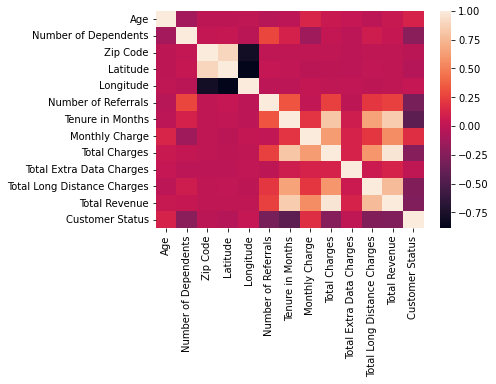

In [41]:
corr= df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [42]:
df.nunique()

Gender                                  2
Age                                    62
Married                                 2
Number of Dependents                   10
City                                 1106
Zip Code                             1626
Latitude                             1626
Longitude                            1625
Number of Referrals                    12
Tenure in Months                       72
Offer                                   6
Phone Service                           2
Avg Monthly Long Distance Charges    3452
Multiple Lines                          3
Internet Service                        2
Internet Type                           4
Avg Monthly GB Download                50
Online Security                         2
Online Backup                           2
Device Protection Plan                  2
Premium Tech Support                    2
Streaming TV                            2
Streaming Movies                        2
Streaming Music                   

In [45]:
df.isnull().sum()

Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download                 0
Online Security                      1344
Online Backup                        1344
Device Protection Plan               1344
Premium Tech Support                 1344
Streaming TV                         1344
Streaming Movies                     1344
Streaming Music                   

In [50]:
df = df.dropna(how = 'any')
df.isnull().sum()

Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                 

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5245 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             5245 non-null   object 
 1   Age                                5245 non-null   int64  
 2   Married                            5245 non-null   object 
 3   Number of Dependents               5245 non-null   int64  
 4   City                               5245 non-null   object 
 5   Zip Code                           5245 non-null   int64  
 6   Latitude                           5245 non-null   float64
 7   Longitude                          5245 non-null   float64
 8   Number of Referrals                5245 non-null   int64  
 9   Tenure in Months                   5245 non-null   int64  
 10  Offer                              5245 non-null   object 
 11  Phone Service                      5245 non-null   objec

In [56]:
print(df['Customer Status'].value_counts())
100. * df['Customer Status'].value_counts() / len(df['Customer Status'])


0    3489
1    1756
Name: Customer Status, dtype: int64


0    66.520496
1    33.479504
Name: Customer Status, dtype: float64

<AxesSubplot:>

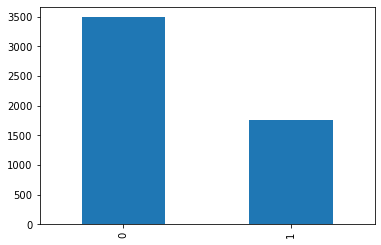

In [53]:
df['Customer Status'].value_counts().plot(kind='bar')